# Clustering Categorical Data 

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [5]:
data = pd.read_csv("Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [6]:
#not in the data
data["continent"].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

In [9]:
data_mapped = data.copy()
data_mapped["continent"] = data_mapped["continent"].map({"North America":0, "Asia":1, "Africa":2, "Europe":3, "South America":4, "Oceania":5, "Antarctica":6, "Seven seas (open ocean)": 7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [28]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## Clustering

In [35]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [36]:
found_clusters = kmeans.fit_predict(x)
data_mapped["Cluster"] = found_clusters
data_mapped

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,1,3
2,Angola,17.537368,-12.293361,2,2
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,3,5
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,6
237,Yemen,47.586762,15.909280,1,3
238,South Africa,25.083901,-29.000341,2,2
239,Zambia,27.774759,-13.458242,2,2


## Plot the data

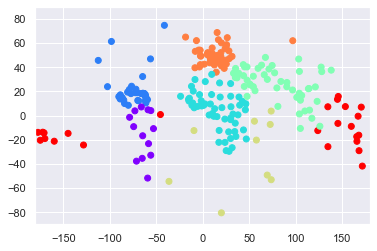

In [37]:
plt.scatter(data_mapped["Longitude"], data_mapped["Latitude"], c =data_mapped["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()